# **Multi-Class Classification** - [`spirals data` creation function from **CS231n**]

Shape of X, y: ((3000, 2), (3000,))
[0.       0.001001 0.002002 0.003003 0.004004] [7.86496435 7.97510027 7.84952402 7.95041971 7.63729308]


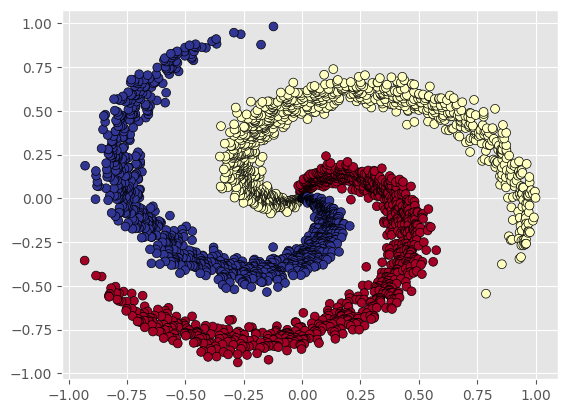

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Parameters for dataset creation
N = 1000  # Defines the number of points per class.
D = 2     # Defines the dimensionality of the data (2D in this case).
K = 3     # Defines the number of classes.

# Initialize data matrix and class labels
X = np.zeros((N*K, D))            # Initializes a `Data Matrix` X with zeros, where each row represents a single example and has a dimension of D.
y = np.zeros(N*K, dtype='uint8')  # Initializes an array y to store class labels, with a length of N*K (number of points per class times number of classes),
                                  # and sets the data type to unsigned 8-bit integers.

# Generate spiral dataset
for j in range(K):
    ix = range(N * j, N * (j + 1)) # Computes the indices corresponding to the current class in the data matrix.
    r = np.linspace(0.0, 1, N)     # Generates N equally spaced points between 0.0 and 1, representing the radius.
    t = np.linspace(j * 4, (j + 1) * 4, N) + (np.random.randn(N)*0.2)  # Generates N equally spaced points between j*4 and (j+1)*4,
                                                                       # representing `theta (angle)`, and adds some random noise to it.
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)] # Calculates the x and y coordinates based on the polar coordinates (r and theta)
    y[ix] = j                                   # Sets the class label for the current class.


print(f"Shape of X, y: {X.shape, y.shape}")
print(r[:5], t[:5])

# Visualize the data
plt.style.use("ggplot")
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors="black")
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train[0], y_train[0])

2400 600 2400 600
(2400, 2) (600, 2) (2400,) (600,)
[ 0.37493426 -0.52193282] 0


In [3]:
from torch import nn

# Create the device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Build a multi-class classification model
class Model(nn.Module):
    def __init__(self, input_features, output_features, hidden_unit):
        super().__init__()
        # Define the layers in the model
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_unit),
            # Uncomment the following lines to add non-linear activation (e.g., ReLU) layers
            # nn.ReLU(),
            nn.Linear(in_features=hidden_unit, out_features=hidden_unit),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_unit, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of the BlobModel and send it to the target device
model = Model(input_features=1,
                  output_features=K,
                  hidden_unit=8).to(device)

# Print the model architecture
print(model)

# Create the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

# Create an accuracy function to evaluate the model performance
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

NameError: name 'torch' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Additional hidden layer
        self.fc3 = nn.Linear(hidden_size, hidden_size)  # Additional hidden layer
        self.fc4 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out

# Hyperparameters
input_size = 2
hidden_size = 100
num_classes = 3
learning_rate = 0.1
num_epochs = 10000

# Create the model
model = NeuralNetwork(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Assuming you have X and y defined somewhere before this point

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

# Training the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Convert tensor back to numpy array
X_numpy = X_tensor.detach().numpy()

# Visualize the decision boundary
x_min, x_max = X_numpy[:, 0].min() - 1, X_numpy[:, 0].max() + 1
y_min, y_max = X_numpy[:, 1].min() - 1, X_numpy[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
input_data = np.c_[xx.ravel(), yy.ravel()]
input_tensor = torch.from_numpy(input_data).float()
output_tensor = model(input_tensor)
_, predicted = torch.max(output_tensor, 1)
Z = predicted.numpy()
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 7))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_numpy[:, 0], X_numpy[:, 1], c=y, s=30, cmap=plt.cm.Spectral)
plt.title('Neural Network Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()